# Pendahuluan Neural Network
<br><br>
<img src="images/neural network.jpg"  style="width: 800px;" />

image source: https://medium.com/@samuelsena/pengenalan-deep-learning-8fbb7d8028ac

## Sejarah

<img src="images/sejarah NN.jpg"/>

image source: https://www.linkedin.com/pulse/history-neural-networks-datta-dharanikota/


## Manfaat

<img src="images/aplikasi NN.png" style="width: 800px"/>

image source: https://www.youtube.com/watch?v=bfmFfD2RIcg

<img src="images/pros and cons.jpeg" style="width: 800px"/>

image source: https://slidetodoc.com/neural-networks-and-support-vector-machines-outline-neural/

## Konsep Neural Network

<img src="images/neural network 1.jpg"  style="width: 600px;" />

- Terdapat beberapa *activation function*, di antaranya sebagai berikut:
<img src="images/activation functions.jpg" width=500 height=500/>

image source: https://docs.paperspace.com/machine-learning/wiki/activation-function

- Struktur dasar NN

<img alt="" src="images/struktur neural network.JPG" style="width: 400px;" />

## Contoh sistem kerja Neural Network
link: https://youtu.be/o20mBWPHGEw

<div style="text-align: center">
    <video align="center" controls src="videos/neural network.mp4" width="560" height="315">

## Neural Network menggunakan Tensorflow dan Keras

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load Dataset Harga Rumah
# link: https://www.kaggle.com/wisnuanggara/daftar-harga-rumah?select=DATA+RUMAH.xlsx

harga_rumah = pd.read_excel('data/DATA RUMAH.xlsx')
harga_rumah.head(10)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
5,6,Rumah Mewah Modern Murah 3 lantai di Tebet Jak...,4970000000,300,154,5,3,3
6,7,"Rumah lama di Tebet, dekat MT Haryono dan tol ...",2600000000,120,150,3,2,1
7,8,RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...,10500000000,350,247,4,4,0
8,9,Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...,3250000000,125,90,3,3,0
9,10,"Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...",4500000000,250,96,5,4,1


In [3]:
harga_rumah.drop(['NO', 'NAMA RUMAH'], axis = 1, inplace = True)
harga_rumah.head(10)

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3
5,4970000000,300,154,5,3,3
6,2600000000,120,150,3,2,1
7,10500000000,350,247,4,4,0
8,3250000000,125,90,3,3,0
9,4500000000,250,96,5,4,1


In [9]:
X = harga_rumah[['LB','LT','KT','KM','GRS']]
y = harga_rumah[['HARGA']]/10**9 # harga dalam satuan 1 miliar rupiah

# Check the shape of training data
print(X.shape,y.shape)

(1010, 5) (1010, 1)


In [112]:
X.head(), y.head()

(    LB   LT  KT  KM  GRS
 0  220  220   3   3    0
 1  180  137   4   3    2
 2  267  250   4   4    4
 3   40   25   2   2    0
 4  400  355   6   5    3,
    HARGA
 0   3.80
 1   4.60
 2   3.00
 3   0.43
 4   9.00)

In [10]:
# Create training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# Set up the network

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(5,))) # First Hidden Layer with relu activation function
model.add(Dense(64, activation='relu'))                    # Second Hidden Layer with relu activation function
model.add(Dense(1, activation='linear'))                   # Output Layer without or linear activation function 

# Configure the network with optimizer and loss function

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit the model
history = model.fit(X_train_scaled, y_train, 
                    epochs=100,
                    validation_split=0.1, verbose=1)

Epoch 1/100
20/20 [==============================] - 16s 30ms/step - loss: 99.8829 - val_loss: 89.0911
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 95.3210 - val_loss: 64.3680
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 72.9478 - val_loss: 31.6624
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 44.2281 - val_loss: 22.8983
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 45.4881 - val_loss: 20.2405
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 36.6818 - val_loss: 17.9106
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 26.6330 - val_loss: 15.7826
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 25.3773 - val_loss: 13.8198
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 23.8135 - val_loss: 12.0045
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 19.0216 - val_l

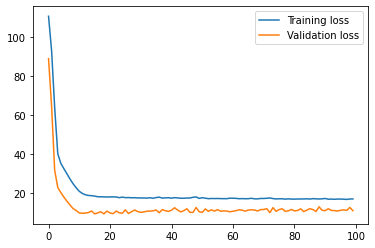

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [16]:
# MSE test data
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

11.792815452927956

In [17]:
hasil = pd.DataFrame()
hasil['HARGA']=y_test.HARGA
hasil['HARGA_PREDIKSI']=y_pred
hasil

,HARGA,HARGA_PREDIKSI
915,2.400,3.771047
701,3.250,6.176735
293,2.999,3.367759
507,6.000,5.975505
970,2.750,3.374276
...,...,...
457,3.500,3.859187
428,11.500,12.875116
61,18.000,10.573299
541,3.975,7.088748
